# Difference in Differences with sci-kit learn models

In [1]:
from sklearn.linear_model import LinearRegression

import causalpy as cp

In [2]:
data = cp.load_data("did")

In [3]:
result = cp.DifferenceInDifferences(
    data,
    formula="y ~ 1 + group*post_treatment",
    time_variable_name="t",
    group_variable_name="group",
    model=LinearRegression(),
)

/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/benjamv/opt/mambaforge/envs/CausalPy/lib/python3.11/site-packages/matplotlib/text.py:1463: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a sin

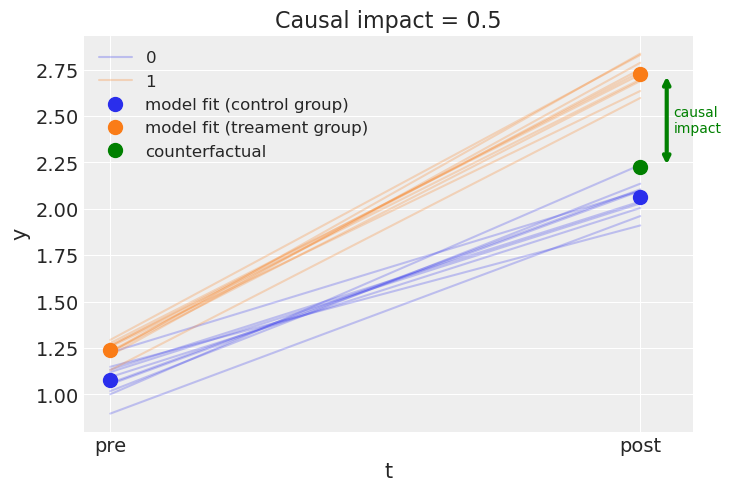

In [4]:
fig, ax = result.plot(round_to=3)

In [5]:
result.summary(round_to=3)

===========================Difference in Differences============================
Formula: y ~ 1 + group*post_treatment

Results:
Causal impact = 0.50
Model coefficients:
  Intercept                   	         0
  post_treatment[T.True]      	     0.986
  group                       	     0.162
  group:post_treatment[T.True]	     0.504
